# Instalación de dependencias


# Configuración de cuenta de usuario


In [1]:
from iol_client import IOLClient

Se recomienda usar el archivo `.env` para colocar claves privadas, pero este espacio tambien puede ser usado como punto de entrada de datos privados. Tener la debida precaución.


In [2]:
import os

user = os.getenv("IOL_USER") or ""
password = os.getenv("IOL_PASS") or ""

In [3]:
client_iol = IOLClient(username=user, password=password)

# Historico anual de un determinado instrumento


In [4]:
from datetime import date
from iol_client.constants import Ajustada, Mercado

In [5]:
hoy = date.today()
hace_un_anio = hoy.replace(year=hoy.year - 1)
historico = await client_iol.get_titulo_historicos(
    simbolo="GGAL",
    mercado=Mercado.BCBA,
    fecha_desde=hace_un_anio,
    fecha_hasta=hoy,
    ajustada=Ajustada.AJUSTADA,
)

In [6]:
import pandas as pd

df = pd.DataFrame(data=historico)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,965.20,0.0,960.00,970.90,957.05,2023-07-26 17:00:02.333,sube,0.0,1.021321e+09,1060766,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,958.65,0.0,930.15,963.00,920.00,2023-07-25 17:09:27.677,sube,0.0,1.094254e+09,1151802,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,935.10,0.0,960.00,983.90,931.00,2023-07-24 17:00:02.323,sube,0.0,1.687546e+09,1766927,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,956.95,0.0,930.85,965.00,926.60,2023-07-21 17:00:01.707,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,925.40,0.0,910.15,932.35,898.00,2023-07-20 17:00:01.707,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


## Guardando los datos


Exportamos datos a un excel


In [7]:
# df.to_excel("historico.xlsx")

Leer datos desde excel


In [8]:
# df = pd.read_excel("historico.xlsx")

## Analisis y visualización


Primera vista de los datos


In [9]:
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,965.20,0.0,960.00,970.90,957.05,2023-07-26 17:00:02.333,sube,0.0,1.021321e+09,1060766,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,958.65,0.0,930.15,963.00,920.00,2023-07-25 17:09:27.677,sube,0.0,1.094254e+09,1151802,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,935.10,0.0,960.00,983.90,931.00,2023-07-24 17:00:02.323,sube,0.0,1.687546e+09,1766927,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,956.95,0.0,930.85,965.00,926.60,2023-07-21 17:00:01.707,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,925.40,0.0,910.15,932.35,898.00,2023-07-20 17:00:01.707,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


Cantidad de registros encontrados


In [10]:
df.shape

(245, 20)

Graficando variables en función del tiempo


In [11]:
df.set_index("fechaHora", inplace=True)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
fechaHora,,,,,,,,,,,,,,,,,,,
2023-07-26 17:00:02.333,965.20,0.0,960.00,970.90,957.05,sube,0.0,1.021321e+09,1060766,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-25 17:09:27.677,958.65,0.0,930.15,963.00,920.00,sube,0.0,1.094254e+09,1151802,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-24 17:00:02.323,935.10,0.0,960.00,983.90,931.00,sube,0.0,1.687546e+09,1766927,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-21 17:00:01.707,956.95,0.0,930.85,965.00,926.60,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-20 17:00:01.707,925.40,0.0,910.15,932.35,898.00,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


In [12]:
df.sort_index(inplace=True)

Text(0, 0.5, 'Precio(pesos argentinos)')

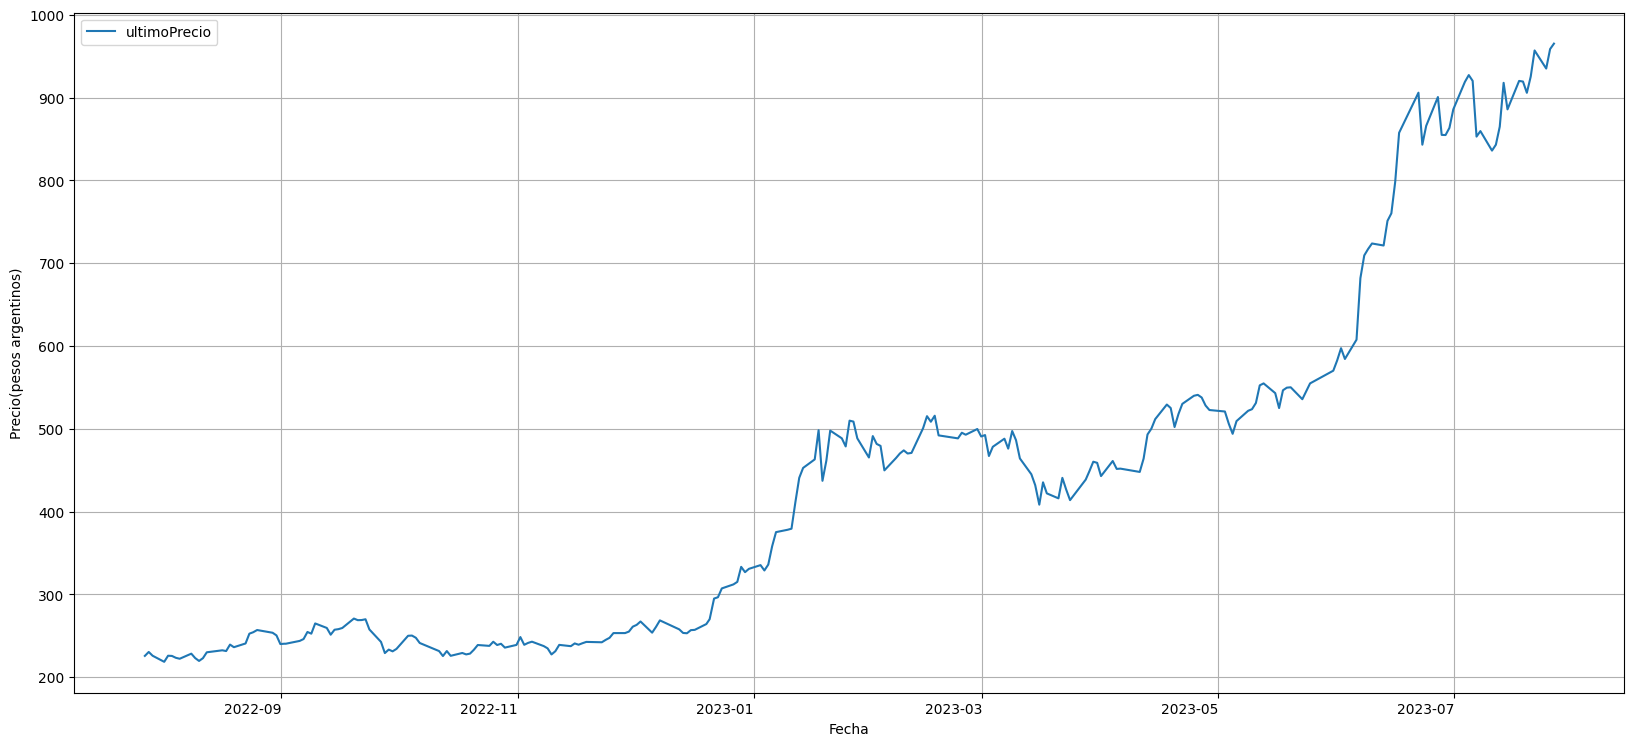

In [13]:
fig = df.plot.line(y="ultimoPrecio", rot=0, figsize=(20, 10), grid=True)
fig.set_xlabel("Fecha")
fig.set_ylabel("Precio(pesos argentinos)")

# Intrumentos


In [15]:
from iol_client.constants import Pais


instrumentos = await client_iol.get_instrumentos(pais=Pais.ARG)
instrumentos = pd.DataFrame(data=instrumentos)
instrumentos

,instrumento,pais
0,Acciones,argentina
1,Bonos,argentina
2,Opciones,argentina
3,Cauciones,argentina
4,Futuros,argentina
5,FCI,argentina


# Panel general de un determinado instrumento


In [16]:
from iol_client.constants import Instrumento


panel = await client_iol.get_paneles(pais=Pais.ARG, instrumento=Instrumento.ARG.BONOS)
panel = pd.DataFrame(data=panel)
panel

,panel
0,Soberanos en pesos más Cer
1,Soberanos en pesos a tasa variable
2,Soberanos en pesos a tasa fija
3,Soberanos en dólares
4,Soberanos dolar linked
5,Provinciales en pesos
6,Provinciales dolar linked
7,Provinciales en dólares
8,Provinciales en euros
9,Cupones vinculados al PBI


# Titulos


In [17]:
titulo = await client_iol.get_titulo(simbolo="CUAP", mercado=Mercado.BCBA)

In [18]:
titulo = pd.Series(data=titulo)
titulo

simbolo                                          CUAP
descripcion    Bonos Cuasi Par $ 3,31% 2045 (Ley Arg)
pais                                        argentina
mercado                                          bcba
tipo                                  TitulosPublicos
plazo                                              t2
moneda                                 peso_Argentino
dtype: object

# Opciones de un titulo


In [19]:
opciones_titulo = await client_iol.get_titulo_opciones(
    mercado=Mercado.BCBA, simbolo="GGAL"
)

In [20]:
opciones_titulo = pd.DataFrame(data=opciones_titulo)

In [21]:
cotizacion_opciones_titulo = opciones_titulo["cotizacion"].apply(pd.Series)
cotizacion_opciones_titulo = pd.DataFrame(data=cotizacion_opciones_titulo)

In [22]:
opciones_titulo = opciones_titulo.drop(columns=["cotizacion"])
opciones_titulo

,simboloSubyacente,fechaVencimiento,tipoOpcion,simbolo,descripcion,pais,mercado,tipo,plazo,moneda
0,GGAL,2023-08-18,Put,GFGV34304G,Put GGAL 343.04 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
1,GGAL,2023-08-18,Call,GFGC34304G,Call GGAL 343.04 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
2,GGAL,2023-08-18,Call,GFGC37152G,Call GGAL 371.52 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
3,GGAL,2023-08-18,Put,GFGV37152G,Put GGAL 371.52 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
4,GGAL,2023-08-18,Call,GFGC39152G,Call GGAL 391.52 Vencimiento: 18/08/2023,argentina,bcba,OPCIONES,t1,peso_Argentino
...,...,...,...,...,...,...,...,...,...,...
255,GGAL,2023-12-15,Put,GFGV1400DI,"Put GGAL 1,400.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino
256,GGAL,2023-12-15,Put,GFGV1450DI,"Put GGAL 1,450.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino
257,GGAL,2023-12-15,Call,GFGC1450DI,"Call GGAL 1,450.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino
258,GGAL,2023-12-15,Call,GFGC1500DI,"Call GGAL 1,500.00 Vencimiento: 15/12/2023",argentina,bcba,OPCIONES,t1,peso_Argentino


In [23]:
cotizacion_opciones_titulo

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,0.017,-10.52,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
1,582.100,-8.47,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
2,555.980,-8.57,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
3,0.026,0.00,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
4,535.000,-7.09,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.000,0.00,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
256,0.000,0.00,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
257,0.000,0.00,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0
258,0.000,0.00,0.0,0.0,0.0,0001-01-01 00:00:00,sube,0.0,0.0,0,0.0,0,0.0,0.0,None,0,None,None,0,0


In [24]:
cotizacion_opciones_titulo.shape, opciones_titulo.shape

((260, 20), (260, 10))

# Cotizacion de un titulo


In [25]:
cotizacion = await client_iol.get_titulo_cotizacion(
    simbolo="GGAL", mercado=Mercado.BCBA
)

In [26]:
puntas_cotizacion = cotizacion["puntas"]
puntas_cotizacion = pd.DataFrame(data=puntas_cotizacion)

In [27]:
puntas_cotizacion

,cantidadCompra,precioCompra,precioVenta,cantidadVenta
0,1543.0,899.00,901.00,1215.0
1,1027.0,898.50,903.30,1.0
2,1146.0,898.00,904.15,13968.0
3,5.0,897.05,904.40,2760.0
4,2016.0,897.00,904.90,2690.0


In [28]:
cotizacion = pd.Series(data=cotizacion)
cotizacion = cotizacion.drop(labels=["puntas"])
cotizacion

ultimoPrecio                                  900.0
variacion                                     -6.75
apertura                                      951.0
maximo                                        958.2
minimo                                        899.0
fechaHora                2023-07-27 19:42:29.806673
tendencia                                      sube
cierreAnterior                                965.2
montoOperado                      1898097231.200001
volumenNominal                              2049752
precioPromedio                                  0.0
moneda                               peso_Argentino
precioAjuste                                    0.0
interesesAbiertos                               0.0
cantidadOperaciones                            3976
descripcionTitulo      Grupo Financiero Galicia S.A
plazo                                            T2
laminaMinima                                      1
lote                                              1
dtype: objec

# Panel de cotizaciones


In [29]:
from iol_client.constants import Panel


panel_cotizaciones = await client_iol.get_panel_cotizaciones(
    pais=Pais.ARG,
    instrumento=Instrumento.ARG.BONOS,
    panel=Panel.ARG.BONOS.SOBERANO_ARS_CER,
)

In [30]:
titulos_panel_cotizaciones = panel_cotizaciones["titulos"]

In [31]:
def flat_titulo(titulo):
    return {
        **titulo,
        "puntas": None,
        "precioCompra": titulo["puntas"]["precioCompra"],
        "precioVenta": titulo["puntas"]["precioVenta"],
        "cantidadCompra": titulo["puntas"]["cantidadCompra"],
        "cantidadVenta": titulo["puntas"]["cantidadVenta"],
    }

In [32]:
titulos_flated = [flat_titulo(titulo) for titulo in titulos_panel_cotizaciones]
titulos_flated = pd.DataFrame(data=titulos_flated)
titulos_flated = titulos_flated.drop(columns=["puntas"])
titulos_flated

,simbolo,descripcion,ultimoPrecio,variacionPorcentual,apertura,maximo,minimo,ultimoCierre,volumen,cantidadOperaciones,fecha,tipoOpcion,precioEjercicio,fechaVencimiento,mercado,moneda,precioCompra,precioVenta,cantidadCompra,cantidadVenta
0,CUAP,"Bonos Cuasi Par $ 3,31% 2045 (Ley Arg)",5730.0,2.50,5540.0,5750.0,5480.0,5590.0,34116.0,54.0,2023-07-27 16:40:47.370,None,None,None,BCBA,AR$,5660.0,5739.0,3338.0,3000.0
1,DICP,Bono Discount $ 2033 (Ley Arg),8400.0,0.23,8360.0,8550.0,8360.0,8380.0,405894.0,175.0,2023-07-27 16:37:53.820,None,None,None,BCBA,AR$,8393.0,8400.0,150.0,9963.0
2,DIP0,Bono Discount $ + CER 2033 (Ley Arg),8251.0,0.37,8225.0,8390.0,8225.0,8220.0,377.0,14.0,2023-07-27 16:39:12.640,None,None,None,BCBA,AR$,8251.0,8390.0,2933.0,1790.0
3,PAP0,Bonos Par AR$ + CER 2038 (Ley Arg),4140.0,0.00,4138.0,4140.0,4138.0,4140.0,0.0,0.0,2023-07-27 03:00:00.137,None,None,None,BCBA,AR$,4150.0,4400.0,10.0,34.0
4,PARP,Bono Par $ (Ley Arg),4310.0,1.89,4349.5,4359.5,4200.0,4230.0,239001.0,75.0,2023-07-27 16:40:45.353,None,None,None,BCBA,AR$,4310.0,4330.0,12933.0,8059.0
5,PR13,Bocon - Bono de Consolidación $ 6 Serie,799.0,-1.84,810.0,824.5,785.0,814.0,976430.0,76.0,2023-07-27 16:38:23.680,None,None,None,BCBA,AR$,797.5,799.0,1800.0,25000.0


# Detalle mobile de una cotizacion


In [34]:
from iol_client.constants import Plazo


cotizacion_detalle_mobile = await client_iol.get_titulo_cotizacion_plazo(
    mercado=Mercado.BCBA, simbolo="GGAL", plazo=Plazo.T0
)
cotizacion_detalle_mobile

{'operableCompra': True,
 'operableVenta': False,
 'visible': True,
 'ultimoPrecio': 904.0,
 'variacion': -5.91,
 'apertura': 957.0,
 'maximo': 957.0,
 'minimo': 893.05,
 'fechaHora': datetime.datetime(2023, 7, 27, 19, 30, 3, 938952),
 'tendencia': 'sube',
 'cierreAnterior': 960.8,
 'montoOperado': 143545530.6,
 'volumenNominal': 154835,
 'precioPromedio': 0.0,
 'moneda': 'peso_Argentino',
 'precioAjuste': 0.0,
 'interesesAbiertos': 0.0,
 'puntas': [{'cantidadCompra': 5.0,
   'precioCompra': 898.9,
   'precioVenta': 905.0,
   'cantidadVenta': 383.0},
  {'cantidadCompra': 30.0,
   'precioCompra': 896.0,
   'precioVenta': 909.9,
   'cantidadVenta': 5.0},
  {'cantidadCompra': 100.0,
   'precioCompra': 895.1,
   'precioVenta': 909.95,
   'cantidadVenta': 10.0},
  {'cantidadCompra': 56.0,
   'precioCompra': 895.0,
   'precioVenta': 927.85,
   'cantidadVenta': 5.0},
  {'cantidadCompra': 8.0,
   'precioCompra': 894.5,
   'precioVenta': 927.9,
   'cantidadVenta': 5.0}],
 'cantidadOperaciones':

In [35]:
# get all keys of json
keys = [key for key in cotizacion_detalle_mobile.keys()]
keys

['operableCompra',
 'operableVenta',
 'visible',
 'ultimoPrecio',
 'variacion',
 'apertura',
 'maximo',
 'minimo',
 'fechaHora',
 'tendencia',
 'cierreAnterior',
 'montoOperado',
 'volumenNominal',
 'precioPromedio',
 'moneda',
 'precioAjuste',
 'interesesAbiertos',
 'puntas',
 'cantidadOperaciones',
 'simbolo',
 'pais',
 'mercado',
 'tipo',
 'descripcionTitulo',
 'plazo',
 'laminaMinima',
 'lote',
 'cantidadMinima',
 'puntosVariacion']

In [39]:
columns = [
    "operableCompra",
    "operableVenta",
    "visible",
    "ultimoPrecio",
    "variacion",
    "apertura",
    "maximo",
    "minimo",
    "fechaHora",
    "tendencia",
    "cierreAnterior",
    "montoOperado",
    "volumenNominal",
    "precioPromedio",
    "moneda",
    "precioAjuste",
    "interesesAbiertos",
    "puntas",
    "cantidadOperaciones",
    "simbolo",
    "pais",
    "mercado",
    "tipo",
    "descripcionTitulo",
    "plazo",
    "laminaMinima",
    "lote",
    "cantidadMinima",
    "puntosVariacion",
]

In [40]:
columns_without_puntas = [col for col in df.columns if "punta" not in col]

In [44]:
df_cotizaciones_sin_puntas = pd.Series(data=cotizacion_detalle_mobile)
df_cotizaciones_sin_puntas

operableCompra                                                      True
operableVenta                                                      False
visible                                                             True
ultimoPrecio                                                       904.0
variacion                                                          -5.91
apertura                                                           957.0
maximo                                                             957.0
minimo                                                            893.05
fechaHora                                     2023-07-27 19:30:03.938952
tendencia                                                           sube
cierreAnterior                                                     960.8
montoOperado                                                 143545530.6
volumenNominal                                                    154835
precioPromedio                                     

In [47]:
puntas = cotizacion_detalle_mobile["puntas"]
puntas

[{'cantidadCompra': 5.0,
  'precioCompra': 898.9,
  'precioVenta': 905.0,
  'cantidadVenta': 383.0},
 {'cantidadCompra': 30.0,
  'precioCompra': 896.0,
  'precioVenta': 909.9,
  'cantidadVenta': 5.0},
 {'cantidadCompra': 100.0,
  'precioCompra': 895.1,
  'precioVenta': 909.95,
  'cantidadVenta': 10.0},
 {'cantidadCompra': 56.0,
  'precioCompra': 895.0,
  'precioVenta': 927.85,
  'cantidadVenta': 5.0},
 {'cantidadCompra': 8.0,
  'precioCompra': 894.5,
  'precioVenta': 927.9,
  'cantidadVenta': 5.0}]

In [50]:
cotizaciones_flatted = [{
    **cotizacion_detalle_mobile,
    'puntas': None,
    'cantidadCompra': punta['cantidadCompra'],
    'precioCompra': punta['precioCompra'],
    'precioVenta': punta['precioVenta'],
    'cantidadVenta': punta['cantidadVenta'],
} for punta in puntas ]

df_cotizaciones_flatted = pd.DataFrame(cotizaciones_flatted)
print(df_cotizaciones_flatted)

   operableCompra  operableVenta  visible  ultimoPrecio  variacion  apertura  \
0            True          False     True         904.0      -5.91     957.0   
1            True          False     True         904.0      -5.91     957.0   
2            True          False     True         904.0      -5.91     957.0   
3            True          False     True         904.0      -5.91     957.0   
4            True          False     True         904.0      -5.91     957.0   

   maximo  minimo                  fechaHora tendencia  ...  \
0   957.0  893.05 2023-07-27 19:30:03.938952      sube  ...   
1   957.0  893.05 2023-07-27 19:30:03.938952      sube  ...   
2   957.0  893.05 2023-07-27 19:30:03.938952      sube  ...   
3   957.0  893.05 2023-07-27 19:30:03.938952      sube  ...   
4   957.0  893.05 2023-07-27 19:30:03.938952      sube  ...   

              descripcionTitulo  plazo  laminaMinima  lote cantidadMinima  \
0  Grupo Financiero Galicia S.A     t0             1     1     

In [51]:
df_cotizaciones_flatted.columns

Index(['operableCompra', 'operableVenta', 'visible', 'ultimoPrecio',
       'variacion', 'apertura', 'maximo', 'minimo', 'fechaHora', 'tendencia',
       'cierreAnterior', 'montoOperado', 'volumenNominal', 'precioPromedio',
       'moneda', 'precioAjuste', 'interesesAbiertos', 'puntas',
       'cantidadOperaciones', 'simbolo', 'pais', 'mercado', 'tipo',
       'descripcionTitulo', 'plazo', 'laminaMinima', 'lote', 'cantidadMinima',
       'puntosVariacion', 'cantidadCompra', 'precioCompra', 'precioVenta',
       'cantidadVenta'],
      dtype='object')

In [54]:
df_cotizaciones_flatted_out_puntas = df_cotizaciones_flatted.drop(columns=['puntas'])
df_cotizaciones_flatted_out_puntas

,operableCompra,operableVenta,visible,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,...,descripcionTitulo,plazo,laminaMinima,lote,cantidadMinima,puntosVariacion,cantidadCompra,precioCompra,precioVenta,cantidadVenta
0,True,False,True,904.0,-5.91,957.0,957.0,893.05,2023-07-27 19:30:03.938952,sube,...,Grupo Financiero Galicia S.A,t0,1,1,1,-56.8,5.0,898.9,905.00,383.0
1,True,False,True,904.0,-5.91,957.0,957.0,893.05,2023-07-27 19:30:03.938952,sube,...,Grupo Financiero Galicia S.A,t0,1,1,1,-56.8,30.0,896.0,909.90,5.0
2,True,False,True,904.0,-5.91,957.0,957.0,893.05,2023-07-27 19:30:03.938952,sube,...,Grupo Financiero Galicia S.A,t0,1,1,1,-56.8,100.0,895.1,909.95,10.0
3,True,False,True,904.0,-5.91,957.0,957.0,893.05,2023-07-27 19:30:03.938952,sube,...,Grupo Financiero Galicia S.A,t0,1,1,1,-56.8,56.0,895.0,927.85,5.0
4,True,False,True,904.0,-5.91,957.0,957.0,893.05,2023-07-27 19:30:03.938952,sube,...,Grupo Financiero Galicia S.A,t0,1,1,1,-56.8,8.0,894.5,927.90,5.0


In [55]:
df_cotizaciones_flatted_out_puntas.columns

Index(['operableCompra', 'operableVenta', 'visible', 'ultimoPrecio',
       'variacion', 'apertura', 'maximo', 'minimo', 'fechaHora', 'tendencia',
       'cierreAnterior', 'montoOperado', 'volumenNominal', 'precioPromedio',
       'moneda', 'precioAjuste', 'interesesAbiertos', 'cantidadOperaciones',
       'simbolo', 'pais', 'mercado', 'tipo', 'descripcionTitulo', 'plazo',
       'laminaMinima', 'lote', 'cantidadMinima', 'puntosVariacion',
       'cantidadCompra', 'precioCompra', 'precioVenta', 'cantidadVenta'],
      dtype='object')

In [57]:
array_cotizaciones = df_cotizaciones_flatted_out_puntas.to_records(index=False)
array_cotizaciones

rec.array([( True, False,  True, 904., -5.91, 957., 957., 893.05, '2023-07-27T19:30:03.938952000', 'sube', 960.8, 1.43545531e+08, 154835, 0., 'peso_Argentino', 0., 0., 659, 'GGAL', 'argentina', 'bcba', 'acciones', 'Grupo Financiero Galicia S.A', 't0', 1, 1, 1, -56.8,   5., 898.9, 905.  , 383.),
           ( True, False,  True, 904., -5.91, 957., 957., 893.05, '2023-07-27T19:30:03.938952000', 'sube', 960.8, 1.43545531e+08, 154835, 0., 'peso_Argentino', 0., 0., 659, 'GGAL', 'argentina', 'bcba', 'acciones', 'Grupo Financiero Galicia S.A', 't0', 1, 1, 1, -56.8,  30., 896. , 909.9 ,   5.),
           ( True, False,  True, 904., -5.91, 957., 957., 893.05, '2023-07-27T19:30:03.938952000', 'sube', 960.8, 1.43545531e+08, 154835, 0., 'peso_Argentino', 0., 0., 659, 'GGAL', 'argentina', 'bcba', 'acciones', 'Grupo Financiero Galicia S.A', 't0', 1, 1, 1, -56.8, 100., 895.1, 909.95,  10.),
           ( True, False,  True, 904., -5.91, 957., 957., 893.05, '2023-07-27T19:30:03.938952000', 'sube', 960.8

In [59]:
numpy_array_cotizaciones = df_cotizaciones_flatted_out_puntas.to_numpy().tolist()
numpy_array_cotizaciones

[[True,
  False,
  True,
  904.0,
  -5.91,
  957.0,
  957.0,
  893.05,
  Timestamp('2023-07-27 19:30:03.938952'),
  'sube',
  960.8,
  143545530.6,
  154835,
  0.0,
  'peso_Argentino',
  0.0,
  0.0,
  659,
  'GGAL',
  'argentina',
  'bcba',
  'acciones',
  'Grupo Financiero Galicia S.A',
  't0',
  1,
  1,
  1,
  -56.8,
  5.0,
  898.9,
  905.0,
  383.0],
 [True,
  False,
  True,
  904.0,
  -5.91,
  957.0,
  957.0,
  893.05,
  Timestamp('2023-07-27 19:30:03.938952'),
  'sube',
  960.8,
  143545530.6,
  154835,
  0.0,
  'peso_Argentino',
  0.0,
  0.0,
  659,
  'GGAL',
  'argentina',
  'bcba',
  'acciones',
  'Grupo Financiero Galicia S.A',
  't0',
  1,
  1,
  1,
  -56.8,
  30.0,
  896.0,
  909.9,
  5.0],
 [True,
  False,
  True,
  904.0,
  -5.91,
  957.0,
  957.0,
  893.05,
  Timestamp('2023-07-27 19:30:03.938952'),
  'sube',
  960.8,
  143545530.6,
  154835,
  0.0,
  'peso_Argentino',
  0.0,
  0.0,
  659,
  'GGAL',
  'argentina',
  'bcba',
  'acciones',
  'Grupo Financiero Galicia S.A',
